In [205]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re

import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Sample DataFrame creation

df = pd.read_csv('all.csv')
df = df.dropna(subset=['Poem'])

# Preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    
    tokens = [token for token in tokens if token not in stop_words]
    
    
    return tokens

# Apply preprocessing to the poem column
df['preprocessed_poem'] = df['Poem'].apply(preprocess_text)
df.head()


,author,Poem,poem name,age,Genre,preprocessed_poem
0,WILLIAM SHAKESPEARE,Let the bird of loudest lay\r\nOn the sole Ara...,The Phoenix and the Turtle,Renaissance,Mythology & Folklore,"[let, bird, loudest, lay, sole, arabian, tree,..."
1,DUCHESS OF NEWCASTLE MARGARET CAVENDISH,"Sir Charles into my chamber coming in,\r\nWhen...",An Epilogue to the Above,Renaissance,Mythology & Folklore,"[sir, charles, chamber, coming, writing, fairy..."
2,THOMAS BASTARD,"Our vice runs beyond all that old men saw,\r\n...","Book 7, Epigram 42",Renaissance,Mythology & Folklore,"[vice, runs, beyond, old, men, saw, far, authe..."
3,EDMUND SPENSER,"Lo I the man, whose Muse whilome did maske,\r\...","from The Faerie Queene: Book I, Canto I",Renaissance,Mythology & Folklore,"[lo, man, whose, muse, whilome, maske, time, t..."
4,RICHARD BARNFIELD,"Long have I longd to see my love againe,\r\nSt...",Sonnet 16,Renaissance,Mythology & Folklore,"[long, longd, see, love, againe, still, wisht,..."


In [206]:
import gensim.downloader as api
from gensim.models import Word2Vec

#we can use glove below but the result from word2vec were better compared to glove 
#wv = api.load('glove-wiki-gigaword-300')

wv = api.load('word2vec-google-news-300')




In [207]:
#this loop is convert tokens into vector using pre trained word embedding 
def sent_vec(sent):
    vector_size = wv.vector_size
    wv_res = np.zeros(vector_size)
    ctr = 1
    for w in sent:
        if w in wv:
            ctr += 1
            wv_res += wv[w]
    wv_res = wv_res / ctr  
    return wv_res
df ['vec'] = df['preprocessed_poem'].apply(sent_vec)
X = df['vec'].to_list()
y = df['Genre'].to_list()

In [208]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# this a suppport vector classifier 
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)


print(classification_report(y_test, y_pred))

                      precision    recall  f1-score   support

                Love       0.81      0.88      0.84        76
Mythology & Folklore       0.67      0.15      0.25        13
              Nature       0.59      0.65      0.62        26

            accuracy                           0.75       115
           macro avg       0.69      0.56      0.57       115
        weighted avg       0.74      0.75      0.72       115



In [209]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)


y_pred = logistic_model.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred))


                      precision    recall  f1-score   support

                Love       0.82      0.89      0.86        76
Mythology & Folklore       0.50      0.08      0.13        13
              Nature       0.60      0.69      0.64        26

            accuracy                           0.76       115
           macro avg       0.64      0.55      0.54       115
        weighted avg       0.73      0.76      0.73       115



In [210]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

#using preprocessed poem for Tf-IDF
X = df['preprocessed_poem'].apply(lambda x: ' '.join(x)).values
y = df['Genre'].values

#spliting for training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#TF-IDF vectorizer 
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

#logistic regression 
logistic_model = LogisticRegression()
logistic_model.fit(X_train_tfidf, y_train)


y_pred = logistic_model.predict(X_test_tfidf)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

#calssification report 
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_rep)


Accuracy: 0.77
Classification Report:
                       precision    recall  f1-score   support

                Love       0.80      0.93      0.86        76
Mythology & Folklore       0.67      0.15      0.25        13
              Nature       0.65      0.58      0.61        26

            accuracy                           0.77       115
           macro avg       0.71      0.55      0.57       115
        weighted avg       0.75      0.77      0.74       115



In [211]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


X = df['preprocessed_poem'].apply(lambda x: ' '.join(x)).values
y = df['Genre'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Support Vector Classification (SVC)
svc_model = SVC(kernel='linear')  
svc_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = svc_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

classification_rep = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_rep)


Accuracy: 0.76
Classification Report:
                       precision    recall  f1-score   support

                Love       0.82      0.89      0.86        76
Mythology & Folklore       0.67      0.15      0.25        13
              Nature       0.59      0.65      0.62        26

            accuracy                           0.76       115
           macro avg       0.69      0.57      0.57       115
        weighted avg       0.75      0.76      0.73       115



In [219]:
from gensim.models import Word2Vec
import numpy as np


tokenized_poems = df['preprocessed_poem'].tolist()

# Train Word2Vec model and ive changed vector size to 400 this helped us to improve the accuracy of the model from 65 to 70 %
#word2vec_model = Word2Vec(sentences=tokenized_poems, vector_size=400, window=10, min_count=1, workers=4)
word2vec_model = Word2Vec(sentences=tokenized_poems, vector_size=400, window=10, min_count=1, workers=4)
def calculate_sentence_vector(sentence, model):
    vector_size = model.vector_size
    wv_res = np.zeros(vector_size)
    ctr = 1
    for word in sentence:
        if word in model.wv:
            ctr += 1
            wv_res += model.wv[word]
    if ctr > 1:
        wv_res = wv_res / ctr
    return wv_res

# using that trained  model
df['vec'] = df['preprocessed_poem'].apply(lambda x: calculate_sentence_vector(x, word2vec_model))
X = df['vec'].to_list()
y = df['Genre'].to_list()



In [220]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)


print(classification_report(y_test, y_pred))

                      precision    recall  f1-score   support

                Love       0.70      0.84      0.76        62
Mythology & Folklore       0.00      0.00      0.00         8
              Nature       0.68      0.62      0.65        45

            accuracy                           0.70       115
           macro avg       0.46      0.49      0.47       115
        weighted avg       0.65      0.70      0.67       115



C:\Users\rithi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rithi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rithi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [214]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)


y_pred = logistic_model.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred))


                      precision    recall  f1-score   support

                Love       0.82      0.83      0.82        76
Mythology & Folklore       0.00      0.00      0.00        13
              Nature       0.45      0.65      0.53        26

            accuracy                           0.70       115
           macro avg       0.42      0.49      0.45       115
        weighted avg       0.64      0.70      0.66       115



C:\Users\rithi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rithi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rithi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


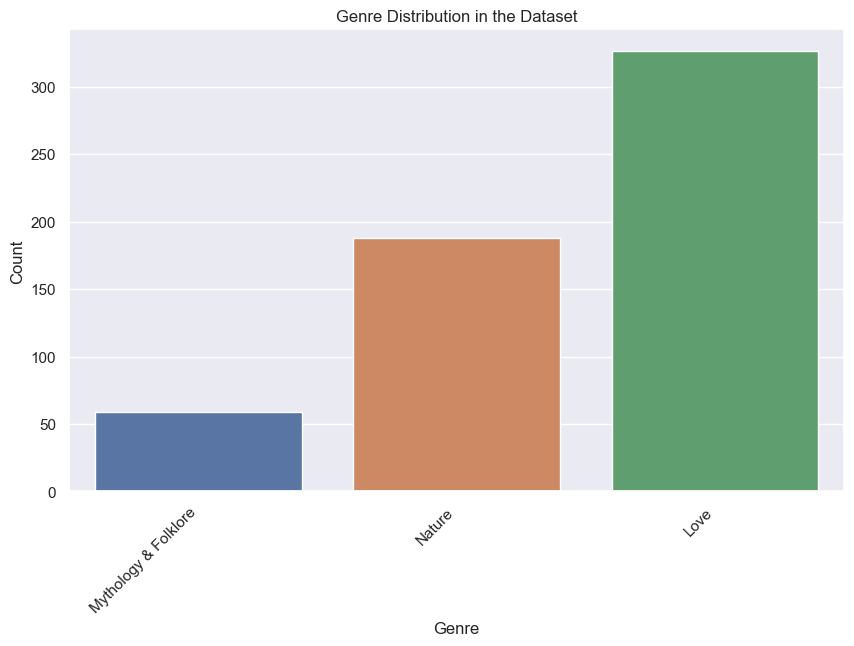

In [215]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

# using countplot for genre 
sns.countplot(x='Genre', data=df)


plt.xticks(rotation=45, ha='right')


plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Distribution in the Dataset')


plt.show()


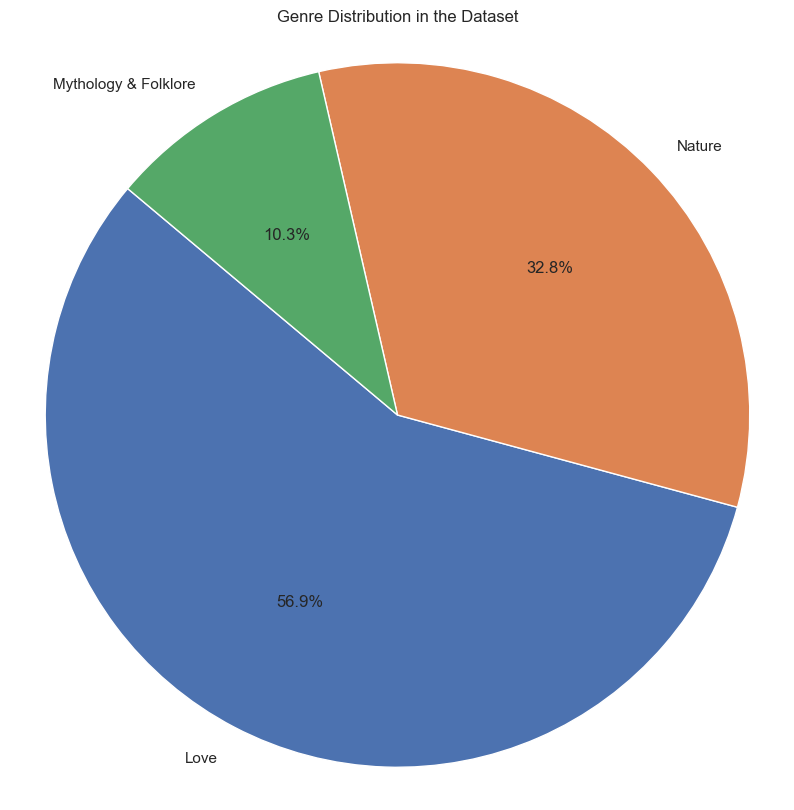

In [216]:
import matplotlib.pyplot as plt


genre_counts = df['Genre'].value_counts()

plt.figure(figsize=(10, 10))

# Pie chart
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)


plt.axis('equal')


plt.title('Genre Distribution in the Dataset')


plt.show()
